<a href="https://colab.research.google.com/github/iamsusmita/ExChange/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

import yfinance as yf
stk="^GSPC"
tkr = yf.Ticker(stk)
#tkr.info
data=tkr.history(period="max")
data.to_csv(stk+'.csv')
df=pd.read_csv(stk+'.csv')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-20 00:00:00-04:00,5602.879883,5620.509766,5585.500000,5597.120117,2994420000,0.0,0.0
2024-08-21 00:00:00-04:00,5603.089844,5632.680176,5591.569824,5620.850098,3119670000,0.0,0.0
2024-08-22 00:00:00-04:00,5637.770020,5643.220215,5560.950195,5570.640137,2981530000,0.0,0.0


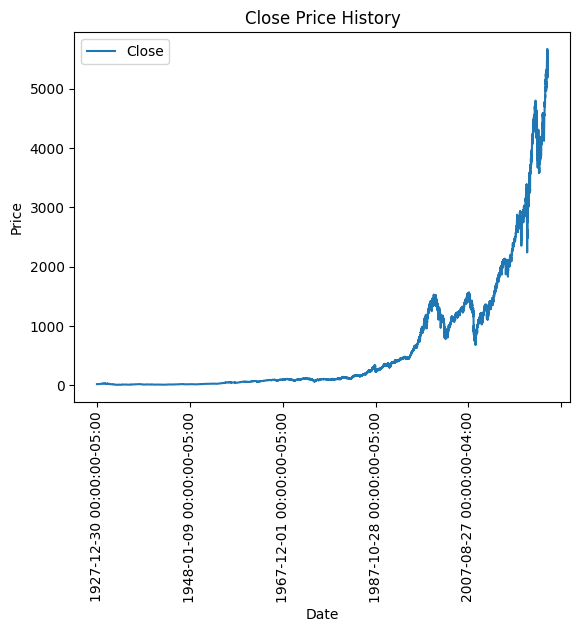

In [74]:
# Import the dataset
#dataset = pd.read_csv('S&P500-cleaned_prices.csv')
#
df.plot(x="Date", y="Close")
plt.xticks(rotation=90)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [75]:
#create the model
model = RandomForestRegressor() #n_estimators=100, random_state=42

In [76]:
#Train the model
feature=df[['Open','High','Low','Volume']]
feature=feature[:int(len(df)-2)]
target=df['Close'].shift(-1)
target=target[:int(len(df)-2)]
model.fit(feature,target)

RandomForestRegressor()

In [77]:
#Test the model
print('The model score is %: ', round(model.score(feature,target) * 100,2))

The model score is %:  100.0


In [81]:
# Make predictions
new_data=df[["Open","High","Low","Volume"]].tail(2)[0:1]
prediction=model.predict(new_data)
print('The prediction for last day price to be: ', prediction)
print('The actual Price is: ', df[['Close']].tail(1).values[0][0])

The prediction for last day price to be:  [5616.78537598]
The actual Price is:  5616.83984375
